Скачать данные из соревнования, пока можете работать только с train.csv. Считать их.

In [1]:
import pandas as pd
l1d = pd.read_csv('train.csv')
y = l1d['Credit Default']

__1.__ Построить график распределения целевой переменной. Сделать выводы.

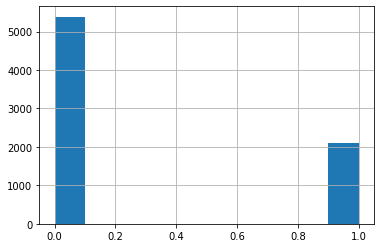

In [2]:
pd.Series(y).hist()

In [3]:
l1d['Credit Default'].value_counts()

0    5387
1    2113
Name: Credit Default, dtype: int64

Выводы:   
- к своеобразному построению гистограмм надо привыкнуть (нулевые значения отображаются после нуля, а единичные значения отображаются до единицы);
- данные выглядят логично, так как большая часть заемщиков, при нормальных условиях, выплачивают ежемесячные обязательства по кредитам;
- количество просрочек составляют 0.28 всех случаев, поэтому, при отсутствии подробностей о текущей кредитной политики банка, рекомендовал бы незначительное ужесточение кредитной политики, чтобы снизить количество просрочек минимум до 0.2;
- оценка с точки зрения метрик accuracy, precision, recall и пр. невозможна так как нет точного понимания параметров TP, FP, FN и пр., так как данные являются статистическими, а не аналитическими.

__2.__ Посчитать основные статистики по каждому признаку (минимальные, максимальные, средние значения). Сделать выводы об адекватности этих статистик.

In [4]:
l1d.describe()

,Annual Income,Tax Liens,Number of Open Accounts,Years of Credit History,Maximum Open Credit,Number of Credit Problems,Months since last delinquent,Bankruptcies,Current Loan Amount,Current Credit Balance,Monthly Debt,Credit Score,Credit Default
count,5.943000e+03,7500.000000,7500.000000,7500.000000,7.500000e+03,7500.000000,3419.000000,7486.000000,7.500000e+03,7.500000e+03,7500.000000,5943.000000,7500.000000
mean,1.366392e+06,0.030133,11.130933,18.317467,9.451537e+05,0.170000,34.692600,0.117152,1.187318e+07,2.898332e+05,18314.454133,1151.087498,0.281733
std,8.453392e+05,0.271604,4.908924,7.041946,1.602622e+07,0.498598,21.688806,0.347192,3.192612e+07,3.178714e+05,11926.764673,1604.451418,0.449874
min,1.645970e+05,0.000000,2.000000,4.000000,0.000000e+00,0.000000,0.000000,0.000000,1.124200e+04,0.000000e+00,0.000000,585.000000,0.000000
25%,8.443410e+05,0.000000,8.000000,13.500000,2.792295e+05,0.000000,16.000000,0.000000,1.801690e+05,1.142565e+05,10067.500000,711.000000,0.000000
50%,1.168386e+06,0.000000,10.000000,17.000000,4.781590e+05,0.000000,32.000000,0.000000,3.095730e+05,2.093230e+05,16076.500000,731.000000,0.000000
75%,1.640137e+06,0.000000,14.000000,21.800000,7.935015e+05,0.000000,50.000000,0.000000,5.198820e+05,3.604062e+05,23818.000000,743.000000,1.000000
max,1.014934e+07,7.000000,43.000000,57.700000,1.304726e+09,7.000000,118.000000,4.000000,1.000000e+08,6.506797e+06,136679.000000,7510.000000,1.000000


Выводы:
- поле Maximum Open Credit имеет существенную разницу между средней и медианой;
- поле Credit Score от части объясняет предыдущий пункт и предположительно коррелирют между собой;
- нужно обратить внимание на поля Bankruptcies, Credit Score, так как они могут содержать пропуски (судя по строке сount);
- поля Annual Income и Months since last delinquent скорее всего не содержат пропуски, а цифры в строке count могут просто соответствовать характеру цифр соответствующих столбцов;
- достаточное количество полей имеют значимые числа в строке среднеквадратического отклонения (std), но понимание значение этого наблюдения недоступно;
- показатели min и max поля Nomber of Open Accounts позволяют мне присмотреться к данным заемщиков, которые имеют большое количество счетов;
- показатель min поля Maximum Open Credit, так как нулевые кредиты бессмысленны;
- если поле Monthly Debt подразумевает ежемесячную выплату, то нулевой показатель min может быть неверным.

__3.__ Посчитать для каждого признака, сколько в нем уникальных значений и как часто они встречаются. Сделать выводы по каждому признаку.

In [12]:
for key, value in enumerate(l1d):
    print(value,'\n', l1d[value].value_counts(),'\n\n')

Home Ownership 
 Home Mortgage    3637
Rent             3204
Own Home          647
Have Mortgage      12
Name: Home Ownership, dtype: int64 


Annual Income 
 1161660.0    4
1058376.0    4
1338113.0    4
1043651.0    4
969475.0     4
            ..
1141254.0    1
7907382.0    1
1534478.0    1
972040.0     1
1654786.0    1
Name: Annual Income, Length: 5478, dtype: int64 


Years in current job 
 10+ years    2332
2 years       705
3 years       620
< 1 year      563
5 years       516
1 year        504
4 years       469
6 years       426
7 years       396
8 years       339
9 years       259
Name: Years in current job, dtype: int64 


Tax Liens 
 0.0    7366
1.0      83
2.0      30
3.0      10
4.0       6
5.0       2
6.0       2
7.0       1
Name: Tax Liens, dtype: int64 


Number of Open Accounts 
 9.0     728
11.0    692
10.0    677
8.0     638
7.0     613
12.0    562
6.0     504
13.0    465
14.0    420
5.0     325
15.0    313
16.0    265
17.0    232
4.0     212
18.0    143
19.0    139
3

Выводы:
- в Home Ownership нет понимания разници между Home Mortgage и Have Mortgage, большая часть заемщико не имеют кредитного обеспечения в виде недвижимости ("Own Home" у небольшого количества заемщиков);
- Annual Income для анализа стоит объединить в подгруппы с различными диапазонами доходов, так как количество одинкаовых доходов среди заемщиков минимально, что усложняет анализ;
- для поля Years in current job также добавил бы подгруппу "до 5 лет", в целом большая часть заемщиков работает на одном месте работы достаточно длительное время, что положительно с точки зрения их кредитования;
- большая часть заемщиков не имеет дополнительных налоговых нагрузок, поэтому данное поле можно не учитывать при обучении модели;
- для качественного анализа полей Number of Open Accounts, Years of Credit History, Maximum Open Credit, Months since last delinquent, Current Loan Amount, Current Credit Balance, Monthly Debt, Credit Score необходимо разбиение на подкатегории;
- исходя из наблюдаемых чисел, поля Number of Credit Problems, Bankruptcies необходимо разбить на три категории (0, 1, 1<);
- поле Purpose необходимо разделить на категории по смыслу (крупные и необходимые траты: home, major, house, medical, etc; необязательные: car, business, other, trip, etc);
- необходимо понять почему поле Purpose отображает информацию о большом количестве debt consolidation;
- необходимо понять почему поле Term отображает информацию о большом количестве Short Term;
- Credit Default целевая переменная, которая выглядит позитивно, но требуется более объемная информация о кредитной политике организации, видацющей кредит.